In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### Link to same Kaggle model https://www.kaggle.com/code/shubham47/linear-regression-salary-dataset

### Read Dataset CSV

In [ ]:
df = pd.read_csv(r'your local path /data.csv')

### EDA (Exploratory Data Analysis)

In [4]:
df.head(4)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0


In [6]:
df.shape

(30, 2)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


In [8]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [9]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [10]:
#any outliers

df.skew()

YearsExperience    0.37956
Salary             0.35412
dtype: float64

In [11]:
df[['YearsExperience','Salary']].cov()

,YearsExperience,Salary
YearsExperience,8.053609,7.610630e+04
Salary,76106.303448,7.515510e+08


In [12]:
df.corr()


,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


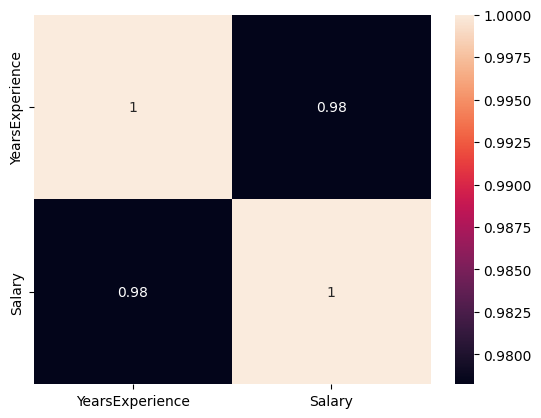

In [17]:
sns.heatmap(df.corr(),annot=True)
plt.show()

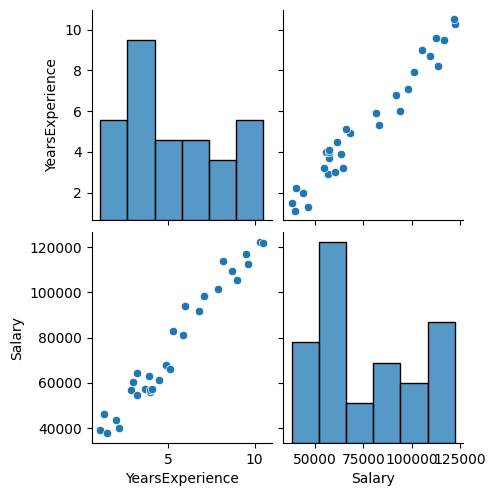

In [19]:
sns.pairplot(df)
plt.show()

In [22]:
# plt.plot(df, linestyle = '--', linewidth='5.7', color='#FF1493')

# df.plot.line(linestyle = ':', linewidth='3')
# plt.title('YearExperiene-VS-Salary')
# plt.show()

In [13]:
X =df.drop('Salary', axis=1)

In [14]:
y = df.Salary

In [15]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [16]:
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

### Model Building

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.4)

In [19]:
print(X_train.shape)

(18, 1)


In [ ]:
X_test.shape

(12, 1)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
LR = LinearRegression()

In [23]:
LR.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [24]:
LR.intercept_

np.float64(26838.99589395697)

In [25]:
LR.coef_

array([9407.35651165])

In [26]:
y_pred=LR.predict(X_test)

In [27]:
y_pred

array([ 40950.03066143, 123734.76796394,  65409.15759172,  63527.68628939,
       116208.88275462, 108682.9975453 , 117149.61840578,  64468.42194055,
        76697.98540569, 101157.11233598,  54120.32977774,  74816.51410337])

In [28]:
y_test

2      37731.0
28    122391.0
13     57081.0
10     63218.0
26    116969.0
24    109431.0
27    112635.0
11     55794.0
17     83088.0
22    101302.0
5      56642.0
16     66029.0
Name: Salary, dtype: float64

In [29]:
from sklearn import metrics


In [30]:
R2=metrics.r2_score(y_test,y_pred)


In [31]:
R2

0.9679117063698979

In [33]:
print(metrics.mean_absolute_error(y_test,y_pred))


3811.8240947365243


In [34]:
print(metrics.mean_squared_error(y_test,y_pred))


25234929.18660526


In [35]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


5023.437984747623


In [40]:
import warnings
warnings.filterwarnings('ignore')  # Suppress all warnings

warnings.warn("This warning will be hidden")
##print("Script continues...")

In [41]:
print(LR.predict([[5]])) 


[73875.7784522]


In [42]:
error= y_test-y_pred


In [43]:
error

2    -3219.030661
28   -1343.767964
13   -8328.157592
10    -309.686289
26     760.117245
24     748.002455
27   -4514.618406
11   -8674.421941
17    6390.014594
22     144.887664
5     2521.670222
16   -8787.514103
Name: Salary, dtype: float64

In [44]:
# import statsmodels.api as smt
# # from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [45]:
#1) How many employees having more than 5 years experience are earning more than 60000?

In [51]:
df[(df['YearsExperience']>5) & (df['Salary']>60000)].count()

YearsExperience    14
Salary             14
dtype: int64

In [68]:
#How many employees are earning between 50000-80000?

In [54]:
df[(df['Salary']>=50000) & (df['Salary']<=80000)].count()

YearsExperience    12
Salary             12
dtype: int64

In [55]:
insigit_2 = df[(df["Salary"] >= 50000) & (df["Salary"] <= 80000)]

In [56]:
print(len(insigit_2))

12


<Axes: xlabel='YearsExperience', ylabel='Salary'>

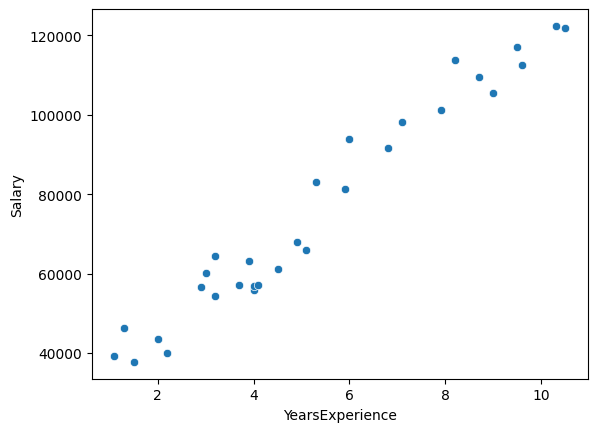

In [10]:
sns.scatterplot(df, x="YearsExperience", y="Salary")

# sns.scatterplot( x=df.YearsExperience, y=df.Salary)

<Axes: >

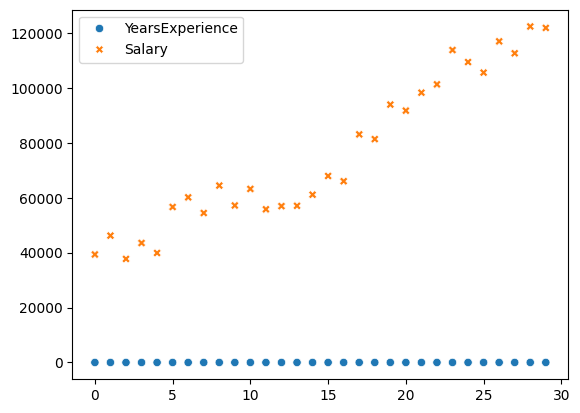

In [ ]:
sns.scatterplot(df)

### Range of Salry and Experience

In [58]:
RangeSalary = max(df.Salary) - min(df.Salary)

In [59]:
RangeSalary

84660.0

In [60]:
RangeExperince = max(df.YearsExperience) - min(df.YearsExperience)
RangeExperince

9.4

### Model Building

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.4)

In [ ]:
print(X_train.shape)

(18, 1)


In [ ]:
X_test.shape

(12, 1)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
LR = LinearRegression()

In [ ]:
LR.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
LR.intercept_

np.float64(26838.99589395697)

In [ ]:
LR.coef_

array([9407.35651165])

In [ ]:
y_pred=LR.predict(X_test)

In [ ]:
y_pred

array([ 40950.03066143, 123734.76796394,  65409.15759172,  63527.68628939,
       116208.88275462, 108682.9975453 , 117149.61840578,  64468.42194055,
        76697.98540569, 101157.11233598,  54120.32977774,  74816.51410337])

In [ ]:
y_test

2      37731.0
28    122391.0
13     57081.0
10     63218.0
26    116969.0
24    109431.0
27    112635.0
11     55794.0
17     83088.0
22    101302.0
5      56642.0
16     66029.0
Name: Salary, dtype: float64

In [ ]:
from sklearn import metrics


In [ ]:
R2=metrics.r2_score(y_test,y_pred)


In [ ]:
R2

0.9679117063698979

In [ ]:
print(metrics.mean_absolute_error(y_test,y_pred))


3811.8240947365243


In [ ]:
print(metrics.mean_squared_error(y_test,y_pred))


25234929.18660526


In [ ]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


5023.437984747623


In [ ]:
import warnings
warnings.filterwarnings('ignore')  # Suppress all warnings

warnings.warn("This warning will be hidden")
##print("Script continues...")

In [ ]:
print(LR.predict([[5]])) 


[73875.7784522]


In [ ]:
error= y_test-y_pred


In [ ]:
error

2    -3219.030661
28   -1343.767964
13   -8328.157592
10    -309.686289
26     760.117245
24     748.002455
27   -4514.618406
11   -8674.421941
17    6390.014594
22     144.887664
5     2521.670222
16   -8787.514103
Name: Salary, dtype: float64